# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [1]:
import pandas as pd
from _conf import PREPROCESSED_DATA

In [2]:
samplns_data = pd.read_json(PREPROCESSED_DATA)
from _conf import EXTENDED_BASELINE_DATA

baseline_data = pd.read_json(EXTENDED_BASELINE_DATA)
baseline_data

,instance_name,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime,sample_size,path_to_baseline_sample,archive_path
0,calculate,9,15,ACTS-IPOG-FT,t2,1620,9.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
1,calculate,9,15,ACTS-IPOG-CSP,t2,654,9.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
2,calculate,9,15,ACTS-IPOF-FT,t2,512,10.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
3,calculate,9,15,ACTS-IPOF-CSP,t2,677,10.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
4,lcm,9,16,ACTS-IPOG-FT,t2,485,9.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
...,...,...,...,...,...,...,...,...,...
2186,am31_sim,1178,2747,FIDE-YASA(15min),t2,900000,72.0,/home/krupke/Repositories/SampLNS/evaluation/0...,None
2187,am31_sim,1178,2747,FIDE-YASA(15min),t2,900000,72.0,/home/krupke/Repositories/SampLNS/evaluation/0...,None
2188,am31_sim,1178,2747,FIDE-YASA(15min),t2,900000,72.0,/home/krupke/Repositories/SampLNS/evaluation/0...,None
2189,am31_sim,1178,2747,FIDE-YASA(15min),t2,900000,72.0,/home/krupke/Repositories/SampLNS/evaluation/0...,None


In [3]:
best_lower_bound = (
    samplns_data.groupby(["instance_name"])["lower_bound"]
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lower_bound"})
)

In [4]:
best_upper_bound = (
    samplns_data.groupby(["instance_name"])["upper_bound"]
    .max()
    .reset_index()
    .rename(columns={"upper_bound": "best_upper_bound"})
)

In [5]:
best_bounds = pd.merge(best_lower_bound, best_upper_bound, on="instance_name")
from _conf import EXPORT_BEST_BOUNDS

best_bounds.to_csv(EXPORT_BEST_BOUNDS)
best_bounds

,instance_name,best_lower_bound,best_upper_bound
0,APL,7,7
1,APL-Model,8,8
2,BankingSoftware,28,29
3,BattleofTanks,256,353
4,ChatClient,7,7
5,DMIE,16,17
6,E-Shop,8,13
7,EMBToolkit,1741,1892
8,FameDB,8,8
9,FeatureIDE,7,8


In [6]:
best_lower_bound["internal_best"] = best_lower_bound["best_lower_bound"]
from _conf import EXTERNAL_BOUNDS

external_best_lb = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_lower_bound"]
    .max()
    .reset_index()
)
best_lower_bound = (
    pd.concat([best_lower_bound, external_best_lb])
    .groupby(["instance_name"])[["best_lower_bound", "internal_best"]]
    .max()
    .reset_index()
)
best_lower_bound

,instance_name,best_lower_bound,internal_best
0,APL,7,7.0
1,APL-Model,8,8.0
2,BankingSoftware,29,28.0
3,BattleofTanks,256,256.0
4,ChatClient,7,7.0
5,DMIE,16,16.0
6,E-Shop,9,8.0
7,EMBToolkit,1872,1741.0
8,FameDB,8,8.0
9,FeatureIDE,7,7.0


In [7]:
best_upper_bound = (
    samplns_data.groupby(["instance_name"])["upper_bound"]
    .min()
    .reset_index()
    .rename(columns={"upper_bound": "best_upper_bound"})
)
best_upper_bound["internal_best_upper_bound"] = best_upper_bound["best_upper_bound"]
from _conf import EXTERNAL_BOUNDS

external_best_ub = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_upper_bound"]
    .min()
    .reset_index()
)
best_upper_bound = (
    pd.concat([best_upper_bound, external_best_ub])
    .groupby(["instance_name"])[["best_upper_bound", "internal_best_upper_bound"]]
    .min()
    .reset_index()
)
best_upper_bound

,instance_name,best_upper_bound,internal_best_upper_bound
0,APL,7,7.0
1,APL-Model,8,8.0
2,BankingSoftware,29,29.0
3,BattleofTanks,307,338.0
4,ChatClient,7,7.0
5,DMIE,16,16.0
6,E-Shop,12,12.0
7,EMBToolkit,1872,1886.0
8,FameDB,8,8.0
9,FeatureIDE,8,8.0


In [8]:
samplns_data

,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime_baseline,baseline_sample_size,path_to_baseline_sample,archive_path,parameters,instance_name,lower_bound,upper_bound,iteration_info,time_used_by_yasa,timelimit_for_samplns,samplns_used,runtime_samplns,time_limit
0,854,1164,FIDE-YASA,t2_m1_null,2639,30,2023-03-01_13-51-03/36_1_3_2_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",busybox-1_18_0,12,18,"[{'nbrhd_tuples': 141, 'nbrhd_confs': 1, 'iter...",2.639,897.361,True,916.832970,900
1,28,40,FIDE-YASA,t2_m1_null,312,15,2023-03-01_13-51-03/12_1_3_4_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",APL-Model,8,8,"[{'nbrhd_tuples': 204, 'nbrhd_confs': 11, 'ite...",0.312,899.688,True,145.871509,900
2,334,92,FIDE-YASA,t2_m1_null,741,19,2023-03-01_13-51-03/29_1_3_4_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",toybox_2020-12-06_00-02-46,7,14,"[{'nbrhd_tuples': 171, 'nbrhd_confs': 1, 'iter...",0.741,899.259,True,902.233030,900
3,326,499,FIDE-YASA,t2_m1_null,736,22,2023-03-01_13-51-03/28_1_3_1_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",E-Shop,8,12,"[{'nbrhd_tuples': 48, 'nbrhd_confs': 2, 'itera...",0.736,899.264,True,924.385270,900
4,326,499,FIDE-YASA,t2_m1_null,737,22,2023-03-01_13-51-03/28_1_3_3_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",E-Shop,8,12,"[{'nbrhd_tuples': 131, 'nbrhd_confs': 4, 'iter...",0.737,899.263,True,928.903876,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,23,35,FIDE-YASA,t2_m1_null,300,11,2023-03-01_13-51-03/9_1_3_5_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",APL,7,7,"[{'nbrhd_tuples': 207, 'nbrhd_confs': 10, 'ite...",0.300,899.700,True,8.232830,900
226,1397,15692,FIDE-YASA,t2_m1_null,14082,91,2023-03-01_13-51-03/46_1_3_1_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",FreeBSD-8_0_0,25,63,"[{'nbrhd_tuples': 240, 'nbrhd_confs': 6, 'iter...",14.082,885.918,True,911.483217,900
227,1245,3723,FIDE-YASA,t2_m1_null,4817,77,2023-03-01_13-51-03/42_1_3_4_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",eCos-3-0_i386pc,26,53,"[{'nbrhd_tuples': 211, 'nbrhd_confs': 3, 'iter...",4.817,895.183,True,897.367976,900
228,557,4992,FIDE-YASA,t2_m1_null,2124,400,2023-03-01_13-51-03/33_1_3_1_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",fs_2017-05-22,396,396,"[{'nbrhd_tuples': 0, 'nbrhd_confs': 0, 'iterat...",2.124,897.876,True,420.326800,900


In [9]:
samplns_data = samplns_data[["instance_name", "lower_bound", "upper_bound"]]
samplns_data = samplns_data.merge(best_lower_bound, on="instance_name")
samplns_data = samplns_data.merge(best_upper_bound, on="instance_name")
# How many percent is the solution above the best lower bound?
samplns_data["gap"] = 100 * (
    samplns_data["upper_bound"] / samplns_data["best_lower_bound"] - 1
)
samplns_data["diff_to_best"] = 100 * (
    samplns_data["upper_bound"] / samplns_data["best_upper_bound"] - 1
)
samplns_data["algorithm_name"] = "SampLNS"
samplns_data.groupby("instance_name")[["lower_bound", "upper_bound", "gap"]].mean()

,lower_bound,upper_bound,gap
instance_name,,,
APL,7.0,7.0,0.000000
APL-Model,8.0,8.0,0.000000
BankingSoftware,28.0,29.0,0.000000
BattleofTanks,256.0,343.8,34.296875
ChatClient,7.0,7.0,0.000000
DMIE,16.0,16.2,1.250000
E-Shop,8.0,12.2,35.555556
EMBToolkit,1592.6,1889.0,0.908120
FameDB,8.0,8.0,0.000000


In [10]:
samplns_data.groupby("instance_name")[["gap"]].mean().reset_index()[["gap"]].mean()

gap    15.423549
dtype: float64

In [11]:
baseline_data = baseline_data[
    ["instance_name", "sample_size", "baseline_alg", "baseline_alg_conf"]
]
baseline_data = baseline_data.merge(best_lower_bound, on="instance_name")
baseline_data = baseline_data.merge(best_upper_bound, on="instance_name")

baseline_data["gap"] = 100 * (
    (baseline_data["sample_size"] / baseline_data["best_lower_bound"]) - 1
)
baseline_data["diff_to_best"] = 100 * (
    (baseline_data["sample_size"] / baseline_data["best_upper_bound"]) - 1
)


def baseline_alg_name(row):
    settings = row["baseline_alg_conf"]
    if "_m" in settings:
        m = settings.split("_m")[-1].split("_")[0]
        return f"{row['baseline_alg']}(m={m})"
    return row["baseline_alg"]


baseline_data["algorithm_name"] = baseline_data.apply(baseline_alg_name, axis=1)
# baseline_data.rename(columns={"baseline_alg": "Algorithm"})
baseline_data

,instance_name,sample_size,baseline_alg,baseline_alg_conf,best_lower_bound,internal_best,best_upper_bound,internal_best_upper_bound,gap,diff_to_best,algorithm_name
0,calculate,9.0,ACTS-IPOG-FT,t2,5,5.0,5,5.0,80.000,80.000000,ACTS-IPOG-FT
1,calculate,9.0,ACTS-IPOG-CSP,t2,5,5.0,5,5.0,80.000,80.000000,ACTS-IPOG-CSP
2,calculate,10.0,ACTS-IPOF-FT,t2,5,5.0,5,5.0,100.000,100.000000,ACTS-IPOF-FT
3,calculate,10.0,ACTS-IPOF-CSP,t2,5,5.0,5,5.0,100.000,100.000000,ACTS-IPOF-CSP
4,calculate,9.0,FIDE-ICPL,t2,5,5.0,5,5.0,80.000,80.000000,FIDE-ICPL
...,...,...,...,...,...,...,...,...,...,...,...
2019,ea2468,80.0,FIDE-YASA(15min),t2,32,31.0,39,44.0,150.000,105.128205,FIDE-YASA(15min)
2020,ea2468,79.0,FIDE-YASA(15min),t2,32,31.0,39,44.0,146.875,102.564103,FIDE-YASA(15min)
2021,ea2468,79.0,FIDE-YASA(15min),t2,32,31.0,39,44.0,146.875,102.564103,FIDE-YASA(15min)
2022,ea2468,80.0,FIDE-YASA(15min),t2,32,31.0,39,44.0,150.000,105.128205,FIDE-YASA(15min)


In [12]:
gaps = pd.concat(
    [
        samplns_data[["algorithm_name", "instance_name", "gap", "diff_to_best"]],
        baseline_data[["algorithm_name", "instance_name", "gap", "diff_to_best"]],
    ]
)
gaps

,algorithm_name,instance_name,gap,diff_to_best
0,SampLNS,busybox-1_18_0,38.461538,5.882353
1,SampLNS,busybox-1_18_0,38.461538,5.882353
2,SampLNS,busybox-1_18_0,46.153846,11.764706
3,SampLNS,busybox-1_18_0,38.461538,5.882353
4,SampLNS,busybox-1_18_0,38.461538,5.882353
...,...,...,...,...
2019,FIDE-YASA(15min),ea2468,150.000000,105.128205
2020,FIDE-YASA(15min),ea2468,146.875000,102.564103
2021,FIDE-YASA(15min),ea2468,146.875000,102.564103
2022,FIDE-YASA(15min),ea2468,150.000000,105.128205


In [13]:
gaps["algorithm_name"].unique().tolist()

['SampLNS',
 'ACTS-IPOG-FT',
 'ACTS-IPOG-CSP',
 'ACTS-IPOF-FT',
 'ACTS-IPOF-CSP',
 'FIDE-ICPL',
 'FIDE-Chvatal',
 'Incling',
 'FIDE-YASA(m=1)',
 'FIDE-YASA(m=3)',
 'FIDE-YASA(m=5)',
 'FIDE-YASA(m=10)',
 'FIDE-YASA(15min)']

In [14]:
algorithm_selection = [
    "SampLNS",
    "FIDE-ICPL",
    "FIDE-Chvatal",
    "Incling",
    "FIDE-YASA(m=1)",
    "FIDE-YASA(m=3)",
    "FIDE-YASA(m=5)",
    "FIDE-YASA(m=10)",
    "FIDE-YASA(15min)",
    "ACTS-IPOG-FT",
    "ACTS-IPOG-CSP",
    "ACTS-IPOF-FT",
    "ACTS-IPOF-CSP",
]
t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t.dropna(inplace=True)
t = t.groupby("instance_name")[["algorithm_name"]].nunique()
instances_solved_by_all = t[
    t["algorithm_name"] == len(algorithm_selection)
].index.tolist()
instances_solved_by_all

['APL',
 'APL-Model',
 'ChatClient',
 'FameDB',
 'FeatureIDE',
 'SortingLine',
 'TightVNC',
 'Violet',
 'axTLS',
 'busybox_2007-01-24_09-14-09',
 'busybox_2020-12-16_21-53-05',
 'calculate',
 'car',
 'dell',
 'email',
 'gpl',
 'lcm',
 'soletta_2015-06-26_18-38-56',
 'toybox_2006-10-31_23-30-06',
 'toybox_2020-12-06_00-02-46']

In [15]:
print(len(instances_solved_by_all), "instances solved by all")

20 instances solved by all


In [16]:
t = gaps[gaps["instance_name"].isin(instances_solved_by_all)].copy()
t["Instances"] = f"Common subset [{len(instances_solved_by_all)}]"
gaps["Instances"] = "Ignore unsolved"
gaps = pd.concat([gaps, t], ignore_index=True)
gaps

,algorithm_name,instance_name,gap,diff_to_best,Instances
0,SampLNS,busybox-1_18_0,38.461538,5.882353,Ignore unsolved
1,SampLNS,busybox-1_18_0,38.461538,5.882353,Ignore unsolved
2,SampLNS,busybox-1_18_0,46.153846,11.764706,Ignore unsolved
3,SampLNS,busybox-1_18_0,38.461538,5.882353,Ignore unsolved
4,SampLNS,busybox-1_18_0,38.461538,5.882353,Ignore unsolved
...,...,...,...,...,...
3229,FIDE-YASA(15min),busybox_2020-12-16_21-53-05,178.947368,152.380952,Common subset [20]
3230,FIDE-YASA(15min),busybox_2020-12-16_21-53-05,184.210526,157.142857,Common subset [20]
3231,FIDE-YASA(15min),busybox_2020-12-16_21-53-05,178.947368,152.380952,Common subset [20]
3232,FIDE-YASA(15min),busybox_2020-12-16_21-53-05,173.684211,147.619048,Common subset [20]


In [17]:
gaps["solved"] = 0.0
gaps.loc[~gaps["gap"].isna(), "solved"] = 1
gaps.groupby(["algorithm_name"])[["gap"]].mean()

,gap
algorithm_name,
ACTS-IPOF-CSP,70.965433
ACTS-IPOF-FT,73.889668
ACTS-IPOG-CSP,77.726015
ACTS-IPOG-FT,80.577351
FIDE-Chvatal,87.899898
FIDE-ICPL,88.472262
FIDE-YASA(15min),58.758125
FIDE-YASA(m=1),68.821864
FIDE-YASA(m=10),49.550599


In [18]:
num_instances_solved_by_alg = (
    gaps.dropna().groupby("algorithm_name")["instance_name"].nunique().to_dict()
)
num_instances_solved_by_alg

{'ACTS-IPOF-CSP': 21,
 'ACTS-IPOF-FT': 23,
 'ACTS-IPOG-CSP': 22,
 'ACTS-IPOG-FT': 23,
 'FIDE-Chvatal': 37,
 'FIDE-ICPL': 45,
 'FIDE-YASA(15min)': 46,
 'FIDE-YASA(m=1)': 46,
 'FIDE-YASA(m=10)': 46,
 'FIDE-YASA(m=3)': 46,
 'FIDE-YASA(m=5)': 46,
 'Incling': 45,
 'SampLNS': 46}

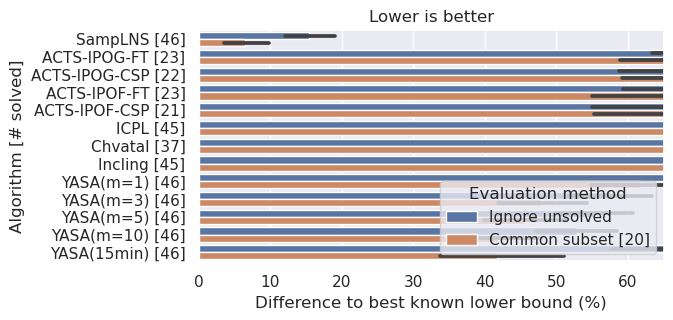

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()

f, ax = plt.subplots(figsize=(6, 3))
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap", hue="Instances")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
plt.legend(loc="lower right", title="Evaluation method")
plt.xlim(0, 65)
plt.show()

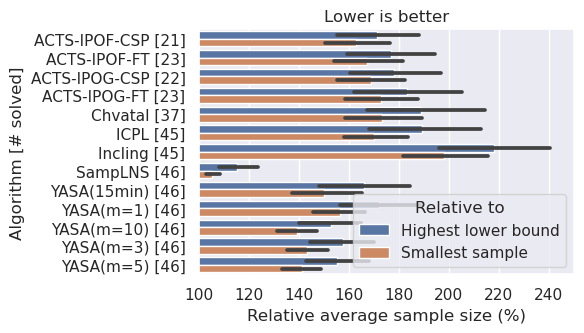

In [20]:
t1 = gaps[["instance_name", "algorithm_name", "gap"]].copy()
t1["Relative to"] = "Best LB"
t2 = (
    gaps[["instance_name", "algorithm_name", "diff_to_best"]]
    .copy()
    .rename(columns={"diff_to_best": "gap"})
)
t2["Relative to"] = "Best UB"
diffs = pd.concat([t1, t2])

f, ax = plt.subplots(figsize=(6, 3.5))
t = diffs.copy()
t["gap"] += 100
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)
t["Relative to"].replace(
    {"Best LB": "Highest lower bound", "Best UB": "Smallest sample"}, inplace=True
)
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
t = (
    t.groupby(["algorithm_name", "Relative to", "instance_name"])[["gap"]]
    .mean()
    .reset_index()
)
t.sort_values(by="algorithm_name", inplace=True)
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap", hue="Relative to")
plt.xlabel("Relative average sample size (%)")
plt.ylabel("Algorithm [# solved]")
plt.legend(loc="lower right", title="Relative to")
plt.xlim(100, 250)
plt.tight_layout()
from _conf import UPPER_LOWER_BOUNDS

plt.savefig(UPPER_LOWER_BOUNDS)
plt.show()

In [21]:
t.groupby(["algorithm_name", "Relative to"])[["gap"]].mean()

gap
algorithm_name     Relative to                    
ACTS-IPOF-CSP [21] Highest lower bound  171.259907
                   Smallest sample      162.995654
ACTS-IPOF-FT [23]  Highest lower bound  176.701348
                   Smallest sample      167.409282
ACTS-IPOG-CSP [22] Highest lower bound  177.876400
                   Smallest sample      168.766013
ACTS-IPOG-FT [23]  Highest lower bound  183.200620
                   Smallest sample      172.739893
Chvatal [37]       Highest lower bound  188.819945
                   Smallest sample      173.363359
ICPL [45]          Highest lower bound  189.064308
                   Smallest sample      170.206637
Incling [45]       Highest lower bound  218.071909
                   Smallest sample      197.949377
SampLNS [46]       Highest lower bound  115.423549
                   Smallest sample      105.456699
YASA(15min) [46]   Highest lower bound  166.188775
                   Smallest sample      150.171571
YASA(m=1) [46]     Highest lower bound  171.898423
                   Smallest sample      156.395622
YASA(m=10) [46]    Highest lower bound  152.888994
                   Smallest sample      139.134347
YASA(m=3) [46]     Highest lower bound  157.588064
                   Smallest sample      143.402107
YASA(m=5) [46]     Highest lower bound  155.257216
                   Smallest sample      141.352315

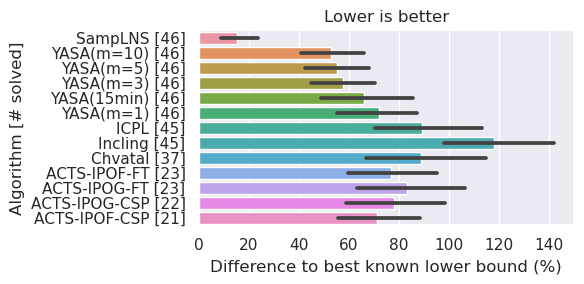

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t = t[t["Instances"] == "Ignore unsolved"]
t = t.groupby(["algorithm_name", "instance_name"])[["gap"]].mean().reset_index()
t_ = (
    t.groupby("algorithm_name")[["gap"]]
    .mean()
    .reset_index()
    .rename(columns={"gap": "gap_mean_of_alg"})
)
t = t.merge(t_, on="algorithm_name")
f, ax = plt.subplots(figsize=(6, 3))
t["num_instance_solved_by_alg"] = t["algorithm_name"].apply(
    lambda s: num_instances_solved_by_alg[s]
)
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)

t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")


def order_algs(alg_name):
    if alg_name.startswith("SampLNS"):
        return (0, len(alg_name), alg_name)
    if alg_name.startswith("YASA"):
        return (1, len(alg_name), alg_name)
    if alg_name.startswith("ACTS"):
        return (3, len(alg_name), alg_name)
    return (2, len(alg_name), alg_name)


t["sort"] = t["algorithm_name"].apply(order_algs)
# t.sort_values(by="sort", inplace=True)
t.sort_values(
    by=["num_instance_solved_by_alg", "gap_mean_of_alg"],
    inplace=True,
    ascending=(False, True),
)

plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap", errorbar="ci")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
# plt.legend(loc="lower right", title="Evaluation method")
plt.xlim(0, 150)
plt.tight_layout()
plt.savefig("./OUTPUT/07_lower_bound_gap.pdf")
plt.show()

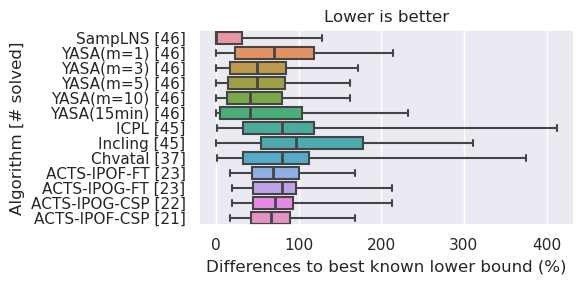

In [23]:
t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t = t[t["Instances"] == "Ignore unsolved"]
t = t.groupby(["algorithm_name", "instance_name"])[["gap"]].mean().reset_index()
f, ax = plt.subplots(figsize=(6, 3))
t["num_instance_solved_by_alg"] = t["algorithm_name"].apply(
    lambda s: num_instances_solved_by_alg[s]
)
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
t_ = (
    t.groupby("algorithm_name")[["gap"]]
    .mean()
    .reset_index()
    .rename(columns={"gap": "gap_mean_of_alg"})
)
t = t.merge(t_, on="algorithm_name")


def order_algs(alg_name):
    if alg_name.startswith("SampLNS"):
        return (0, len(alg_name), alg_name)
    if alg_name.startswith("YASA"):
        return (1, len(alg_name), alg_name)
    if alg_name.startswith("ACTS"):
        return (3, len(alg_name), alg_name)
    return (2, 0, "alg_name")


t["sort"] = t["algorithm_name"].apply(order_algs)
# t.sort_values(by="sort", inplace=True)
t.sort_values(
    by=["num_instance_solved_by_alg", "sort"],
    inplace=True,
    ascending=(False, True),
)

plt.title("Lower is better")
sns.boxplot(
    data=t, y="algorithm_name", x="gap", medianprops={"linewidth": 2.0}, whis=(0, 100)
)
plt.xlabel("Differences to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
# plt.legend(loc="lower right", title="Evaluation method")
# plt.xlim(0, 140)
plt.tight_layout()
plt.savefig("./OUTPUT/07_lower_bound_gap_boxplot.pdf")
plt.show()

In [24]:
t.groupby(["algorithm_name"])[["gap"]].quantile(0.25)

,gap
algorithm_name,
ACTS-IPOF-CSP [21],42.857143
ACTS-IPOF-FT [23],44.345238
ACTS-IPOG-CSP [22],45.329301
ACTS-IPOG-FT [23],45.497312
Chvatal [37],33.333333
ICPL [45],33.333333
Incling [45],54.794521
SampLNS [46],0.000000
YASA(15min) [46],5.040323


In [25]:
t.groupby(["algorithm_name"])[["gap"]].mean()

,gap
algorithm_name,
ACTS-IPOF-CSP [21],71.259907
ACTS-IPOF-FT [23],76.701348
ACTS-IPOG-CSP [22],77.876400
ACTS-IPOG-FT [23],83.200620
Chvatal [37],88.819945
ICPL [45],89.064308
Incling [45],118.071909
SampLNS [46],15.423549
YASA(15min) [46],66.188775


In [26]:
t.groupby(["algorithm_name"])[["gap"]].median().round()

,gap
algorithm_name,
ACTS-IPOF-CSP [21],67.0
ACTS-IPOF-FT [23],69.0
ACTS-IPOG-CSP [22],71.0
ACTS-IPOG-FT [23],80.0
Chvatal [37],80.0
ICPL [45],80.0
Incling [45],97.0
SampLNS [46],0.0
YASA(15min) [46],41.0


In [27]:
# How many instances have been solved to optimality by the baseline algorithms? (Note that this is a lower bound)
t = gaps.groupby(["algorithm_name", "instance_name"])[["gap"]].min() == 0
t = (
    t.reset_index()
    .groupby("algorithm_name")[["gap"]]
    .sum()
    .rename(columns={"gap": "num_opt"})
)
t["num_opt_rel"] = t["num_opt"] / len(gaps["instance_name"].unique())
t

,num_opt,num_opt_rel
algorithm_name,,
ACTS-IPOF-CSP,0,0.000000
ACTS-IPOF-FT,0,0.000000
ACTS-IPOG-CSP,0,0.000000
ACTS-IPOG-FT,0,0.000000
FIDE-Chvatal,0,0.000000
FIDE-ICPL,0,0.000000
FIDE-YASA(15min),7,0.152174
FIDE-YASA(m=1),1,0.021739
FIDE-YASA(m=10),4,0.086957


In [28]:
# How many instances have a gap of less than 10%?
t = gaps.groupby(["algorithm_name", "instance_name"])[["gap"]].min() <= 10
t = (
    t.reset_index()
    .groupby("algorithm_name")[["gap"]]
    .sum()
    .rename(columns={"gap": "num_10"})
)
t["num_10_rel"] = t["num_10"] / len(gaps["instance_name"].unique())
t

,num_10,num_10_rel
algorithm_name,,
ACTS-IPOF-CSP,0,0.000000
ACTS-IPOF-FT,0,0.000000
ACTS-IPOG-CSP,0,0.000000
ACTS-IPOG-FT,0,0.000000
FIDE-Chvatal,2,0.043478
FIDE-ICPL,4,0.086957
FIDE-YASA(15min),15,0.326087
FIDE-YASA(m=1),8,0.173913
FIDE-YASA(m=10),10,0.217391
